## **Heart Disease Prediction Using Machine Learning**

**This notebook has been created for predicting the 'Heart Disease' of a person!**

`Predicting Heart Disease Using Logistic Regression`

[Link to Download the dataset](https://www.kaggle.com/ronitf/heart-disease-uci)

**Date Created**: August 19, 2021


**Author**:
Abhirup Bhattacharjee 

**Reach out**:
 [Kaggle](https://www.kaggle.com/abhirup2000) | [LinkedIn](https://www.linkedin.com/in/abhirup-bhattacharjee-9aa676193?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3ByRSXOTi9TkCcTLx3X1l2Xw%3D%3D)

[[Project Repository](https://github.com/ImmatureAbhirup/Heart-Disease-Prediction-using-Machine-Learning)]

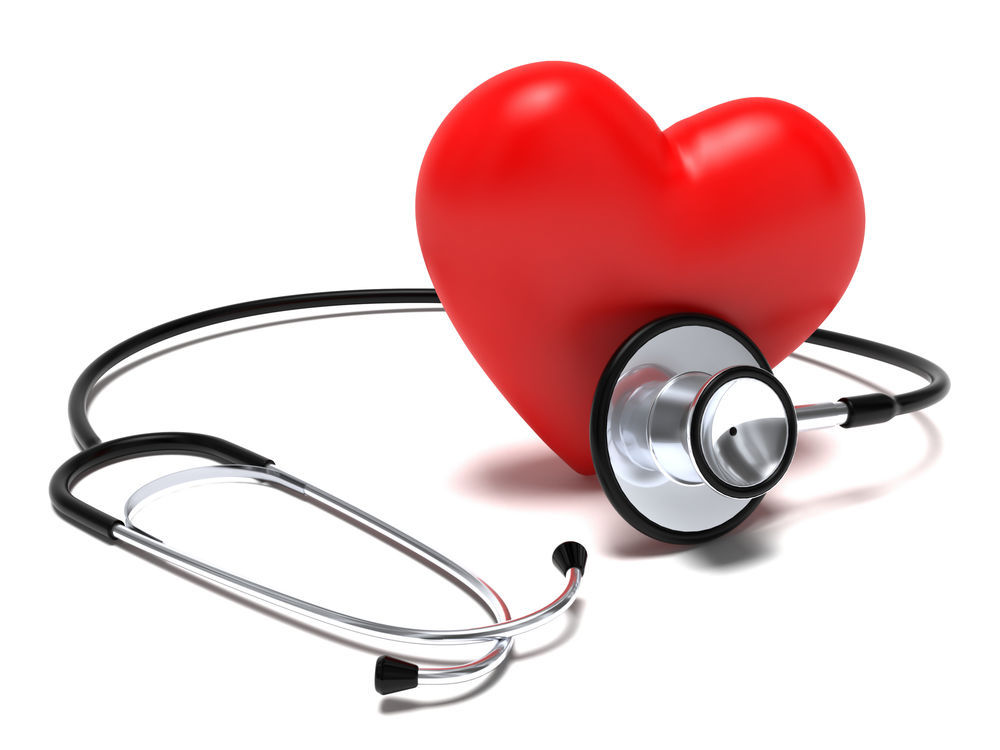

## **Introduction :**

Welcome everyone! Hope, you are enjoying your Data Science field! I guess that's why you are here! You are hungry to learn and build new projects! So without wasting more time, let's start.

This is a Heart Disease Prediction projects where we have to predict a person's heart attack trendency! This project is under Medical Industry domain. But don't worry, you don't have to be a medical expert to do this projects. All you have to know is basic python, machine learning techniques.

Let's go! Are you excited?

### **Helping Hands :**

If you find any difficulty to understand this project, please reach out to me at any time! I will be there to help you!

 - Abhirup Bhattacharjee : [Linkedin](https://www.linkedin.com/in/abhirup-bhattacharjee-9aa676193?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3ByRSXOTi9TkCcTLx3X1l2Xw%3D%3D)

`You can message me via Linkedin!`

Or, You can directly reach out to my mail,

`Here is my mail` :

iammature.business@gmail.com





## **Create data dictionary :**

**age** - age in years

**sex** - (1 = male; 0 = female)

**cp** - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

**trestbps** - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

**chol** - serum cholestoral in mg/dl

**serum** = LDL + HDL + .2 * triglycerides above 200 is cause for concern

**fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- **'>126' mg/dL signals diabetes**

**restecg** - resting electrocardiographic results
- 0: Nothing to note
- 1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
- 2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber

**thalach** - maximum heart rate achieved

**exang** - exercise induced angina (1 = yes; 0 = no)

**oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

**slope** - the slope of the peak exercise ST segment
- 0: Upsloping: better heart rate with excercise (uncommon)
- 1: Flatsloping: minimal change (typical healthy heart)
- 2: Downslopins: signs of unhealthy heart

**ca** - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

**thal** - thalium stress result

- 1,3: normal
- 6: fixed defect: used to be defect but ok now
- 7: reversable defect: no proper blood movement when excercising

**target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

### **Importing Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

### **Importing Dataset**

In [ ]:
data = pd.read_csv("../input/heart-disease-uci/heart.csv")
data.head()

In [ ]:
data.shape 

- Our dataset has 303 rows and 14 columns

In [ ]:
data.info()

In [ ]:
#checking for missing value if any

data.isna().sum()

- We don't have any null values presenst in our dataset. So it's a quite perfect dataset to use. 

### **Statistics** 

In [ ]:
data.describe()

### **Identifying Categorical & Continuous Columns**

In [ ]:
categorical_column = []
continuous_column = []

for column in data.columns:
  print("====================")
  print(f"{column} : {data[column].unique()}")
  if len(data[column].unique())<=6:
    categorical_column.append(column)
  else:
    continuous_column.append(column)


In [ ]:
print(f'categorical columns are : {categorical_column}')
print(f'continous_columns are : {continuous_column}')

### **Creating new columns**

**Let's give label according to the Target Label and Sex Label for better understanding purpose** :

In [ ]:
data["Heart_Disease"] = data["target"].map({0:"No",1:"Yes"})
data["gender"] = data["sex"].map({0:"Female",1:"Male"})
data.head()

## **VISUALIZATION & EXPLORATORY DATA ANALYSIS :** 

**Now, Let's do some visualization on our dataset to do some exploratory data analysis** :

1. **Is our target label balanced? Let's check** :

In [ ]:
Heart_Disease = data.Heart_Disease.value_counts()
Heart_Disease.head()

In [ ]:
sns.countplot(x='Heart_Disease', data=data,palette="Set1",edgecolor=sns.color_palette("dark", 5)).set_title('Count plot for Heart_Disease')

- We have 165 people with heart disease and 138 people with no heart disease. So, our dataset is balanced!  

2. **Let's do the same for Gender Column**

In [ ]:
gender = data['gender'].value_counts()
gender

- We have 207 male and 96 female!

3. **Let's check how many male and female have heart disease? Also, check for non-heart disease people!** 

In [ ]:
data.groupby(['gender','Heart_Disease','fbs'])['Heart_Disease'].count()

In [ ]:
sns.factorplot('gender', hue='Heart_Disease', kind='count', data=data);
plt.title('Factor plot for Male and Female and Heart_Disease')

In [ ]:
print(f"Female's heart disease : {round(data[data.sex == 0]['target'].sum()/data[data.sex == 0]['target'].count()*100)}%")
print(f"Male's heart disease : {round(data[data.sex == 1]['target'].sum()/data[data.sex == 1]['target'].count()*100)}%")

**So, 75 % Female has heart disease and 45% male has heart disease!**

**For female, this is really considerable situation which should be took care!**

### **CP (Chest Pain)**

- **0: Typical angina: chest pain related decrease blood supply to the heart**
- **1: Atypical angina: chest pain not related to heart**
- **2: Non-anginal pain: typically esophageal spasms (non heart related)**
- **3: Asymptomatic: chest pain not showing signs of disease**

In [ ]:
cp = data['cp'].value_counts()
cp

In [ ]:
sns.factorplot('cp', hue='Heart_Disease', kind='count', data=data);
plt.title('Factor plot for cp and Heart_Disease')
plt.show()

In [ ]:
print(f"CP value 0 heart disease : {round(data[data.cp == 0]['target'].sum()/data[data.cp == 0]['target'].count()*100)}%")
print(f"CP value 1 heart disease: {round(data[data.cp == 1]['target'].sum()/data[data.cp == 1]['target'].count()*100)}%")
print(f"CP value 2 heart disease : {round(data[data.cp == 2]['target'].sum()/data[data.cp == 2]['target'].count()*100)}%")
print(f"CP value 3 heart disease: {round(data[data.cp == 3]['target'].sum()/data[data.cp == 3]['target'].count()*100)}%")



- **People with CP(Chest pain) value 0 has less heart disease than people with CP value 1,2,3!**

### **restecg(resting electrocardiographic results)** :

- **0: Nothing to note**
- **1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat**
- **2: Possible or definite left ventricular hypertrophy. Enlarged heart's main pumping chamber**

In [ ]:
restecg = data['restecg'].value_counts()
restecg

In [ ]:
data.groupby(['restecg','Heart_Disease'])['Heart_Disease'].count()

In [ ]:
print(f"restecg value with 1 heart disease : {round(data[data.restecg == 1]['target'].sum()/data[data.restecg == 1]['target'].count()*100)}%")
print(f"restecg value with 0 heart disease : {round(data[data.restecg == 0]['target'].sum()/data[data.restecg == 0]['target'].count()*100)}%")

- **People with restecg(resting EKG results) value 1 has much more heart disease than people with restecg value 0!**

### **thal(thalium stress result) :**

In [ ]:
thal = data['thal'].value_counts()
thal

In [ ]:
data.groupby(['thal','Heart_Disease'])['Heart_Disease'].count()

In [ ]:
print(f"thal value with 1 heart disease : {round(data[data.thal == 1]['target'].sum()/data[data.thal == 1]['target'].count()*100)}%")
print(f"thal value with 2 heart disease : {round(data[data.thal == 2]['target'].sum()/data[data.thal == 2]['target'].count()*100)}%")
print(f"thal value with 3 heart disease : {round(data[data.thal == 3]['target'].sum()/data[data.thal == 3]['target'].count()*100)}%")

- **People with thal(thalium stress result) value 2 have more heart disease than other values 1 & 3!**

### **fbs(fasting blood sugar) :**

**fasting blood sugar > 120 mg/dl)**

**(1 = true; 0 = false)**

--- **'>126' mg/dL signals diabetes**

In [ ]:
fbs = data['fbs'].value_counts()
fbs

In [ ]:
data.groupby(['fbs','Heart_Disease'])['Heart_Disease'].count()

In [ ]:
print(f"fbs value with 1 heart disease : {round(data[data.fbs == 1]['target'].sum()/data[data.fbs == 1]['target'].count()*100)}%")
print(f"fbs value with 0 heart disease : {round(data[data.fbs == 0]['target'].sum()/data[data.fbs == 0]['target'].count()*100)}%")

- **So, it indicates that having "fasting blood sugar" can cause heart disease but people without fbs may have heart disease too!**

### **Slope** :

**the slope of the peak exercise ST segment**

--- **0: Upsloping: better heart rate with excercise (uncommon)**

--- **1: Flatsloping: minimal change (typical healthy heart)**

--- **2: Downslopins: signs of unhealthy heart**

In [ ]:
data.groupby(['slope','Heart_Disease'])['Heart_Disease'].count()

In [ ]:
print(f"slope value with 1 heart disease : {round(data[data.slope == 1]['target'].sum()/data[data.slope == 1]['target'].count()*100)}%")
print(f"slope value with 0 heart disease : {round(data[data.slope == 0]['target'].sum()/data[data.slope == 0]['target'].count()*100)}%")
print(f"slope value with 2 heart disease : {round(data[data.slope == 2]['target'].sum()/data[data.slope == 2]['target'].count()*100)}%")


- **Slope value 2 means you have critical heart! 75% people with slope value 2 are more likely to have heart disease than slope value with 0 & 1!**

### **exang (exercise induced angina)**

- **(1 = yes; 0 = no)**

In [ ]:
data.groupby(['exang','Heart_Disease'])['Heart_Disease'].count()

In [ ]:
print(f"exang value with 0 heart disease : {round(data[data.exang == 0]['target'].sum()/data[data.exang == 0]['target'].count()*100)}%")
print(f"exang value with 1 heart disease : {round(data[data.exang == 1]['target'].sum()/data[data.exang == 1]['target'].count()*100)}%")

- **People without exercise (exang=0/No angina induced by exercise) have more heart disease than People with exercise (exang=0/ angina induced by exercise)**

### **ca - number of major vessels**

- **(0-3) colored by flourosopy**

--- **colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)**


In [ ]:
data.groupby(['ca','Heart_Disease'])['Heart_Disease'].count()

In [ ]:
print(f"ca value with 0 heart disease : {round(data[data.ca == 0]['target'].sum()/data[data.ca == 0]['target'].count()*100)}%")
print(f"ca value with 1 heart disease : {round(data[data.ca == 1]['target'].sum()/data[data.ca == 1]['target'].count()*100)}%")
print(f"ca value with 2 heart disease : {round(data[data.ca == 2]['target'].sum()/data[data.ca == 2]['target'].count()*100)}%")

**The more blood movement, the better your heart is! So, people with ca value 0 are more likely to have heart disease than ca value 1,2,3,4!**

## **Summary:**

1. **sex** : Male has less heart attack trendency(45%) than Female(75%).
2. **cp** : People with cp value 1,2,3 are more likely to have heart disease than people with 0 cp value.
3. **fbs** : Having "fasting blood sugar" can cause heart disease but people without fbs may have heart disease too!
4. **ca** : The more blood movement, the better your heart is! So, people with ca value 0 are more likely to have heart disease than ca value 1,2,3,4!
5. **exang** : People without exercise (exang=0/No angina induced by exercise) have more heart disease than People with exercise (exang=0/ angina induced by exercise)
6. **slope** : Slope value 2 means you have critical heart! 75% people with slope value 2 are more likely to have heart disease than slope value with 0 & 1!
7. **thal** : People with thal(thalium stress result) value 2 have more heart disease than other values 1 & 3!
8. **restecg** : People with restecg(resting EKG results) value 1 has much more heart disease than people with restecg value 0!

## **Creating Model :**

In [ ]:
categorical_column.remove('target')
dataset = pd.get_dummies(data, columns = categorical_column)

In [ ]:
dataset.head()

## **Standardaization**

In [ ]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [ ]:
dataset.columns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
xy=dataset.drop(['target','Heart_Disease','gender'],axis=1)
xy.head()

In [ ]:
yz = dataset['target']
yz.head()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(xy,yz, test_size=.3,stratify=yz, random_state=5)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred= model.predict(x_test)
y_pred

### **ACCURACY**

In [ ]:
(y_pred == y_test).values

In [ ]:
np.mean(y_pred == y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy=confusion_matrix(y_test,y_pred)

In [ ]:
accuracy

### **TRAINING ACCURACY**

In [ ]:
from sklearn.metrics import accuracy_score
y_train_predict = model.predict(x_train)
accuracy = accuracy_score(y_train,y_train_predict)*100 
accuracy
print(f'The accuracy (using accuracy_score) on training_data of our model is {round(accuracy, 2)}%')

### **TESTING ACCURACY**

In [ ]:
from sklearn.metrics import accuracy_score
y_test_predict =  model.predict(x_test)
accuracy_score = accuracy_score(y_test,y_test_predict)*100 
print(f'The accuracy on testing_data of our model is {round(accuracy_score, 2)}%')

**`This is nice accuracy you can say! Our model is predicting correctly!`**

### **CONFUSHION MATRIX**

In [ ]:
from sklearn.metrics import classification_report
print(f'Here is our classification report : \n {classification_report(y_test,y_pred)}')

### **Creating Predictive Model :**

`Let's predict whether our input's person has heart disease or not!`

In [ ]:
input_data = (0.952197,	0.763956,	-0.256334,	0.015443,	1.087338,	0,	1,	1,	1,	0,	1,	0	,0,	1	,0,	0,	0,	0,	1,	0,	0,	0,0,1,0,1,0,1,1,0)


input_data_as_numpy_array = np.asarray(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)

"""
z = np.array([

    [1, 2, 3, 4],
 
    [5, 6, 7, 8],
 
    [9, 10, 11, 12]])

z.shape == (3, 4)

New shape as (1,-1). i.e, row is 1, column unknown. we get result new shape as (1, 12)

z.reshape(1,-1)

array([[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]])

('This upper code is for your understanding purpose!')
"""


if (prediction[0]==1):
  print("He/She has heart disease!")
else :
  print("He/She doesn't has heart disease!")

## **THANK YOU! HAAAVE AAAA GREAT DAY! HOPE YOU ENJOYED MY PROJECT AND UNDERSTAND ALL THE THINGS! PLEASE CONSIDER A UPVOTE IN KAGGLE.**

Here is the link of my **kaggle notebook** : [Notebook](https://www.kaggle.com/abhirup2000/heart-disease)


`You can also find this notebook in my github profile :`

**Github :** [Heart Disease Prediction](https://github.com/ImmatureAbhirup/Heart-Disease-Prediction-using-Machine-Learning)


FOR MORE UPCOMING PROJECT YOU CAN FOLLOW ME TOO!

